In [1]:
import jovian
from fastai.vision import *
from pathlib import Path

<IPython.core.display.Javascript object>

In [2]:
!ls

 data	    'Google Images Downloader -- Fastai.ipynb'	 Untitled2.ipynb
 downloads  'GoogleImagesDownload --Original.ipynb'	 Untitled.ipynb
 env	     image_downloader


In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(Path("data/train"), train=".", test="../test", valid_pct=0.2, bs=4,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.train_ds[0]

(Image (3, 224, 224), Category food)

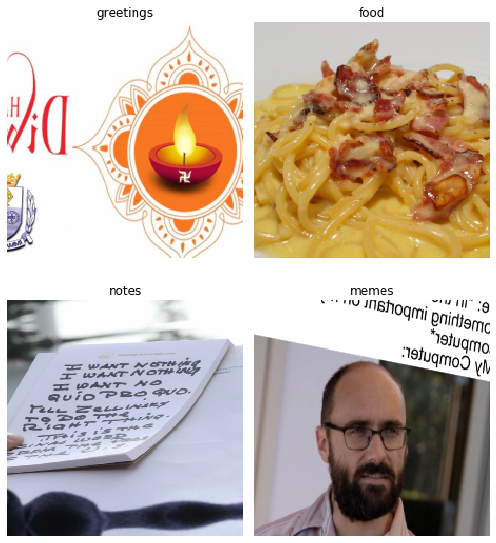

In [5]:
data.show_batch(rows=2, figsize=(7, 8))

In [6]:
data.classes

['food', 'greetings', 'memes', 'misc', 'notes']

In [7]:
data

ImageDataBunch;

Train: LabelList (348 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
food,food,food,food,food
Path: data/train;

Valid: LabelList (87 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
notes,food,food,notes,notes
Path: data/train;

Test: LabelList (23 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data/train

In [8]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/rtx/work/webinar-7dec/env/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [9]:
learn.unfreeze()
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.327501,0.206352,0.045977,00:06
1,1.119327,0.455717,0.103448,00:05
2,1.164562,0.295468,0.091954,00:06
3,1.385829,0.928128,0.252874,00:05
4,1.152933,0.417691,0.149425,00:06
5,1.144077,0.323975,0.126437,00:06
6,0.887475,0.341825,0.091954,00:06
7,0.841365,0.168775,0.045977,00:06
8,0.747417,0.151883,0.057471,00:06
9,0.640792,0.156805,0.045977,00:06


In [10]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, "data/train")

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [11]:
interp = ClassificationInterpretation.from_learner(learn)


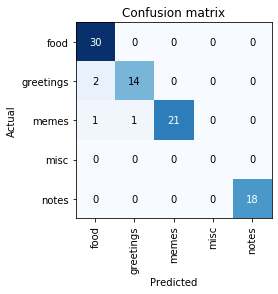

In [12]:
interp.plot_confusion_matrix()

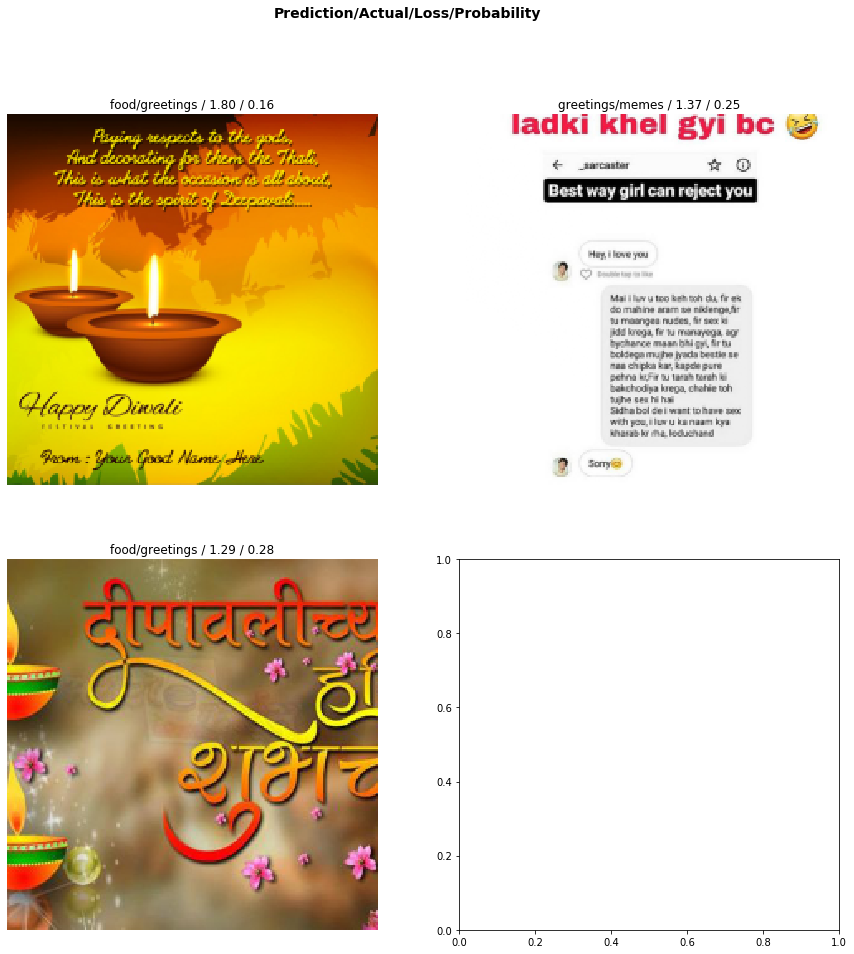

In [47]:
interp.plot_top_losses(9, figsize=(15,15))

In [14]:
predictions, _ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [15]:
labels = labels.numpy()

In [16]:
data.test_ds.x.items

array([PosixPath('data/train/../test/IMG-20190504-WA0009.jpg'),
       PosixPath('data/train/../test/IMG-20190321-WA0003.jpg'),
       PosixPath('data/train/../test/IMG-20181027-WA0010.jpg'),
       PosixPath('data/train/../test/IMG-20181206-WA0000.jpg'),
       PosixPath('data/train/../test/IMG-20190321-WA0002.jpg'),
       PosixPath('data/train/../test/IMG-20181107-WA0015.jpg'),
       PosixPath('data/train/../test/IMG-20190506-WA0005.jpg'),
       PosixPath('data/train/../test/IMG-20181221-WA0004.jpg'),
       PosixPath('data/train/../test/IMG-20181021-WA0000.jpg'),
       PosixPath('data/train/../test/IMG-20181023-WA0003.jpg'),
       PosixPath('data/train/../test/IMG-20181021-WA0005.jpg'),
       PosixPath('data/train/../test/IMG-20190321-WA0005.jpg'),
       PosixPath('data/train/../test/IMG-20181204-WA0000.jpg'),
       PosixPath('data/train/../test/IMG-20181027-WA0009.jpg'),
       PosixPath('data/train/../test/IMG-20190521-WA0004.jpg'),
       PosixPath('data/train/../test/IMG

In [17]:
i2c = {v:k for k,v in learn.data.c2i.items()}

In [18]:
label_classes = [i2c[label] for label in labels]

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame({"item": data.test_ds.x.items, "predicted_class": label_classes })

In [29]:
df.head()

,item,predicted_class
0,data/train/../test/IMG-20190504-WA0009.jpg,memes
1,data/train/../test/IMG-20190321-WA0003.jpg,greetings
2,data/train/../test/IMG-20181027-WA0010.jpg,memes
3,data/train/../test/IMG-20181206-WA0000.jpg,food
4,data/train/../test/IMG-20190321-WA0002.jpg,food


In [41]:
data2 = ImageDataBunch.from_df("", df[df["predicted_class"] == "memes"], ds_tfms=None, size=224, valid_pct=0, bs=4)

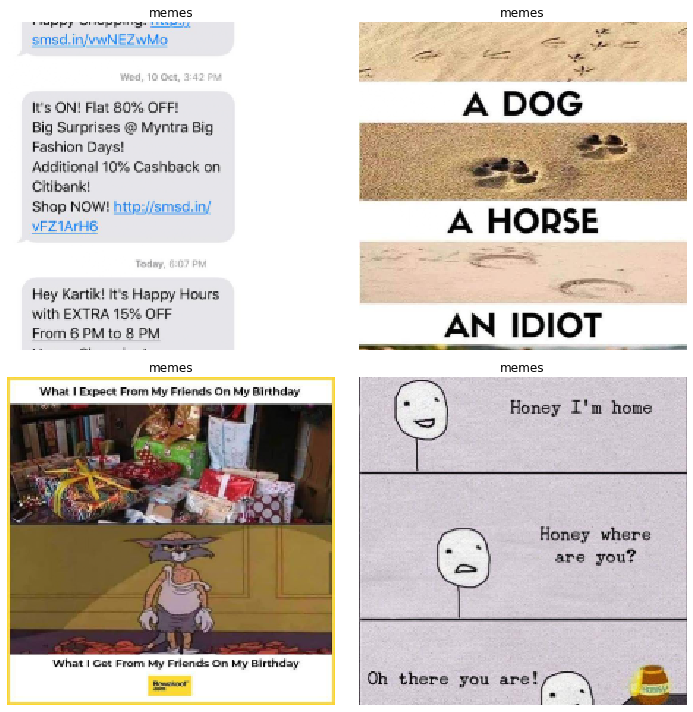

In [42]:
data2.show_batch(rows=4, figsize=(10, 10))

In [44]:
jovian.log_hyperparams({
    "model_name": "resnet34"
})

[jovian] Hyperparameters logged.


In [45]:
jovian.log_metrics({"accuracy": 0.9})

[jovian] Metrics logged.


In [ ]:
jovian.commit()